# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('weatherdata.txt',delimiter='\t',skipfooter=14,engine='python')

### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [3]:
df = df[df.Notes!='Total'].drop(columns=['Notes'])

>3) Make a column called Date that is in the pandas datetime format

In [4]:
df['Date'] = pd.to_datetime(df['Month Day, Year Code'])

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [5]:
df['Year'] = df['Month Day, Year Code'].apply(lambda x : x.split('/')[0])
df['Month'] = df['Month Day, Year Code'].apply(lambda x : x.split('/')[1])
df['Day'] = df['Month Day, Year Code'].apply(lambda x : x.split('/')[2])

In [6]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

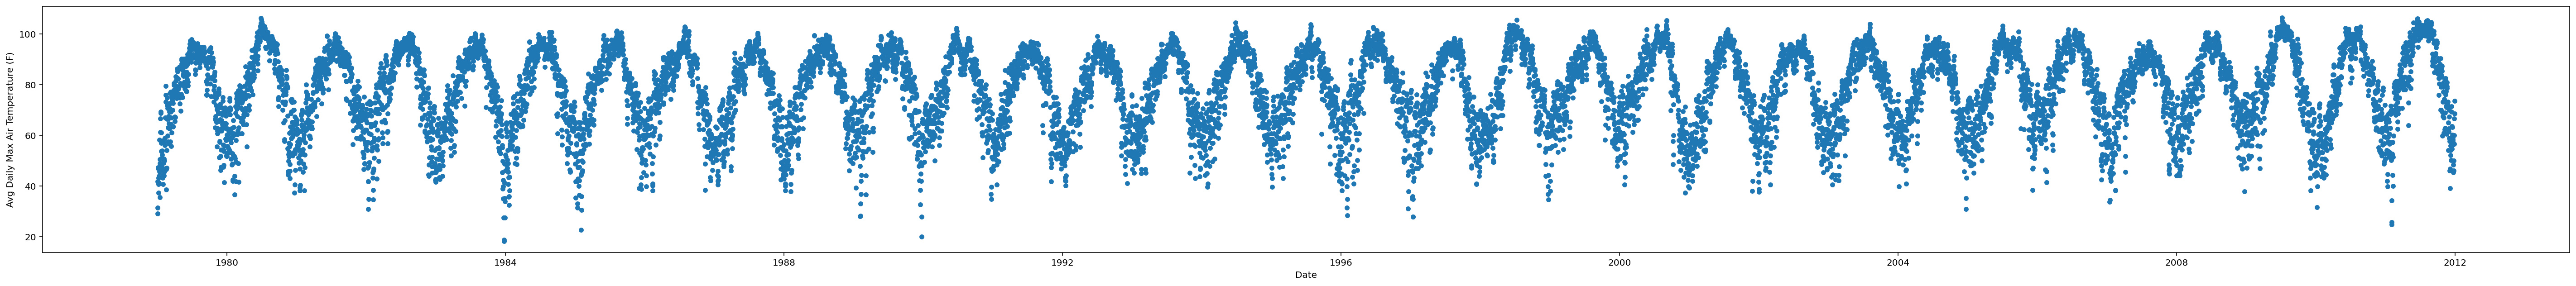

In [7]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(50, 5))

>5) Describe your plot.

The plot appears to be oscillating, similar to a wave. It represents the seasons.

### Adding colors for our graph

In [8]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

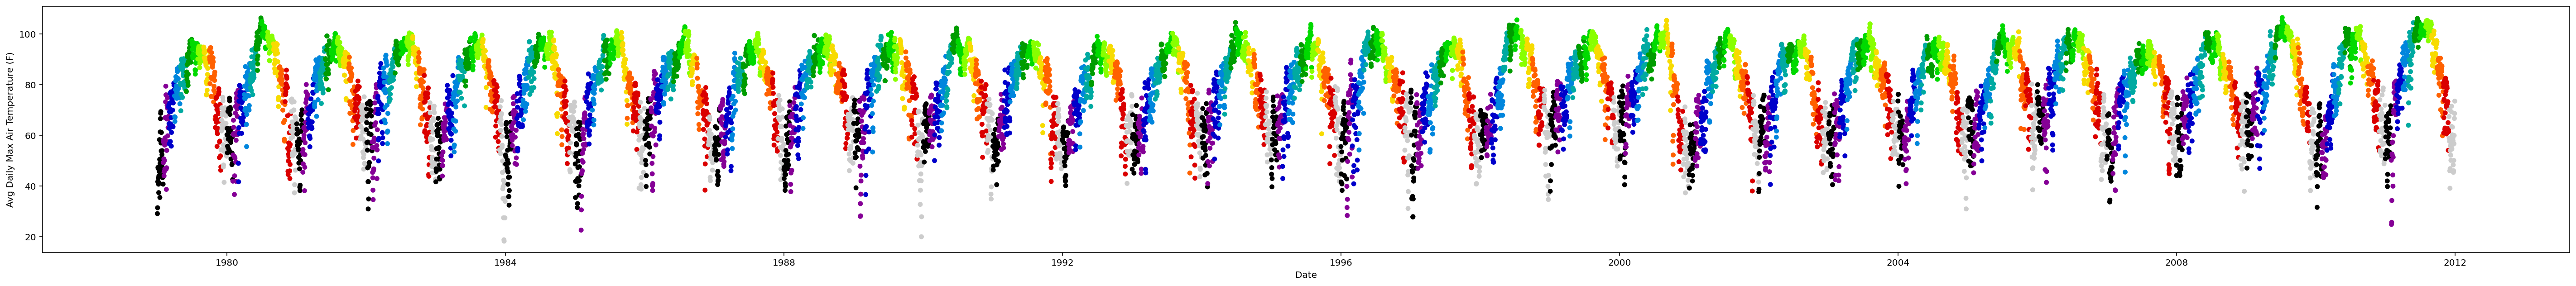

In [10]:
df.plot.scatter(x='Date', 
                y='Avg Daily Max Air Temperature (F)',
                figsize=(50,5),
               c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [11]:
sub = df[(df['Date']>=pd.datetime(1984,1,1)) & (df['Date']<pd.datetime(1984,7,1))]

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

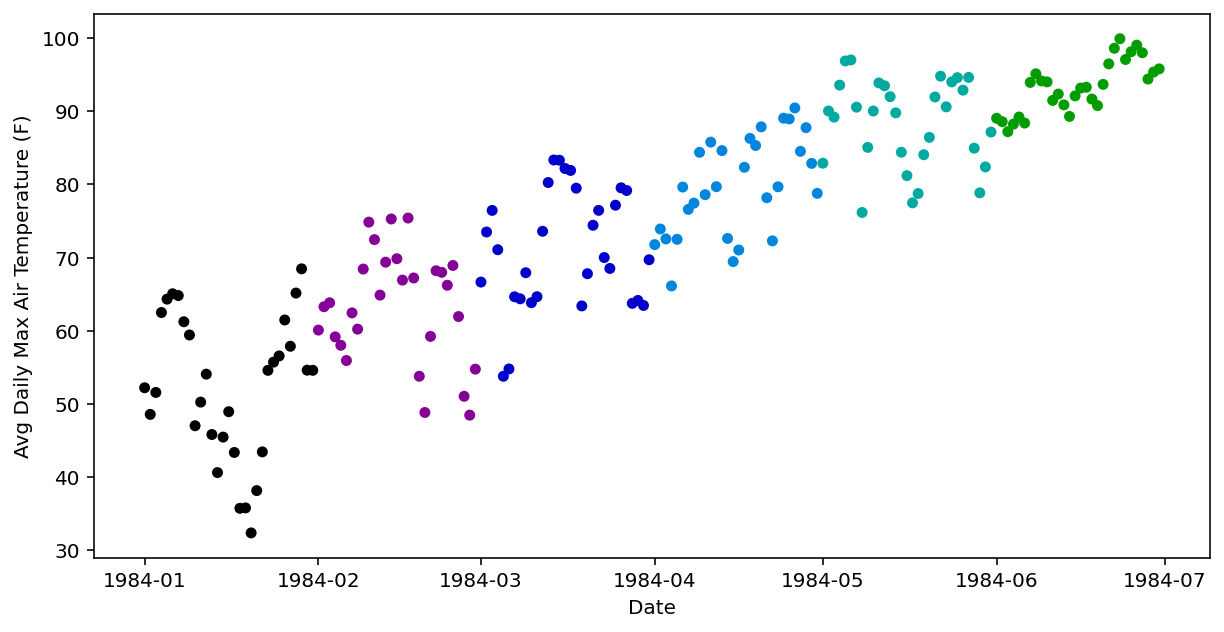

In [15]:
sub.plot.scatter(x='Date', 
                y='Avg Daily Max Air Temperature (F)',
                figsize=(10,5),
               c=sub['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [31]:
X=sub['DateInt'].values
Y=sub['Avg Daily Max Air Temperature (F)'].values

In [32]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [33]:
Y_pred = lin_reg(X,Y)

0.00031024329222522327 -1320.1252280361614


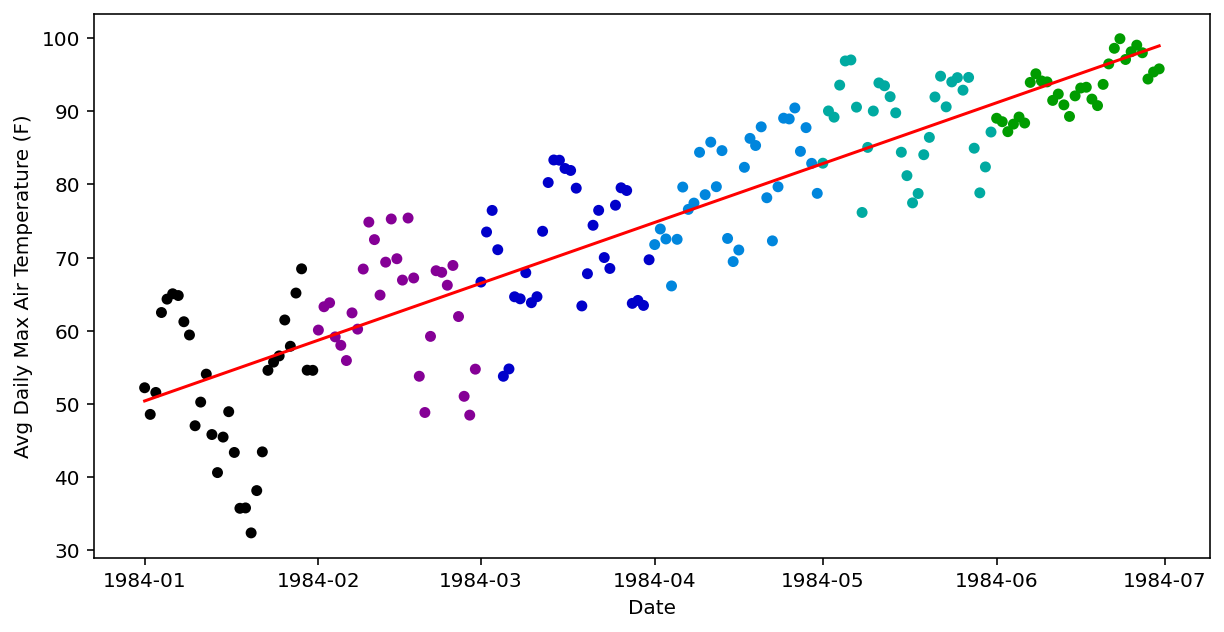

In [34]:
sub.plot.scatter(x='Date', 
                 y='Avg Daily Max Air Temperature (F)',
                 figsize=(10,5),
                 c=sub['color'])
plt.plot([min(sub['Date'].values), 
          max(sub['Date'].values)], 
         [min(Y_pred), max(Y_pred)], 
         color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

Slope = 0.00031024329222522327<br>
Intercept = -1320.1252280361614

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [39]:
print('Y min: ', min(Y_pred), ' ', '\nY max: ', max(Y_pred))
print('Positive slope.')

Y min:  76.54274731393126   
Y max:  79.74202660127659
Positive slope.


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [41]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values
Y_pred = lin_reg(X,Y)

3.072410840971274e-07 75.67019246681011


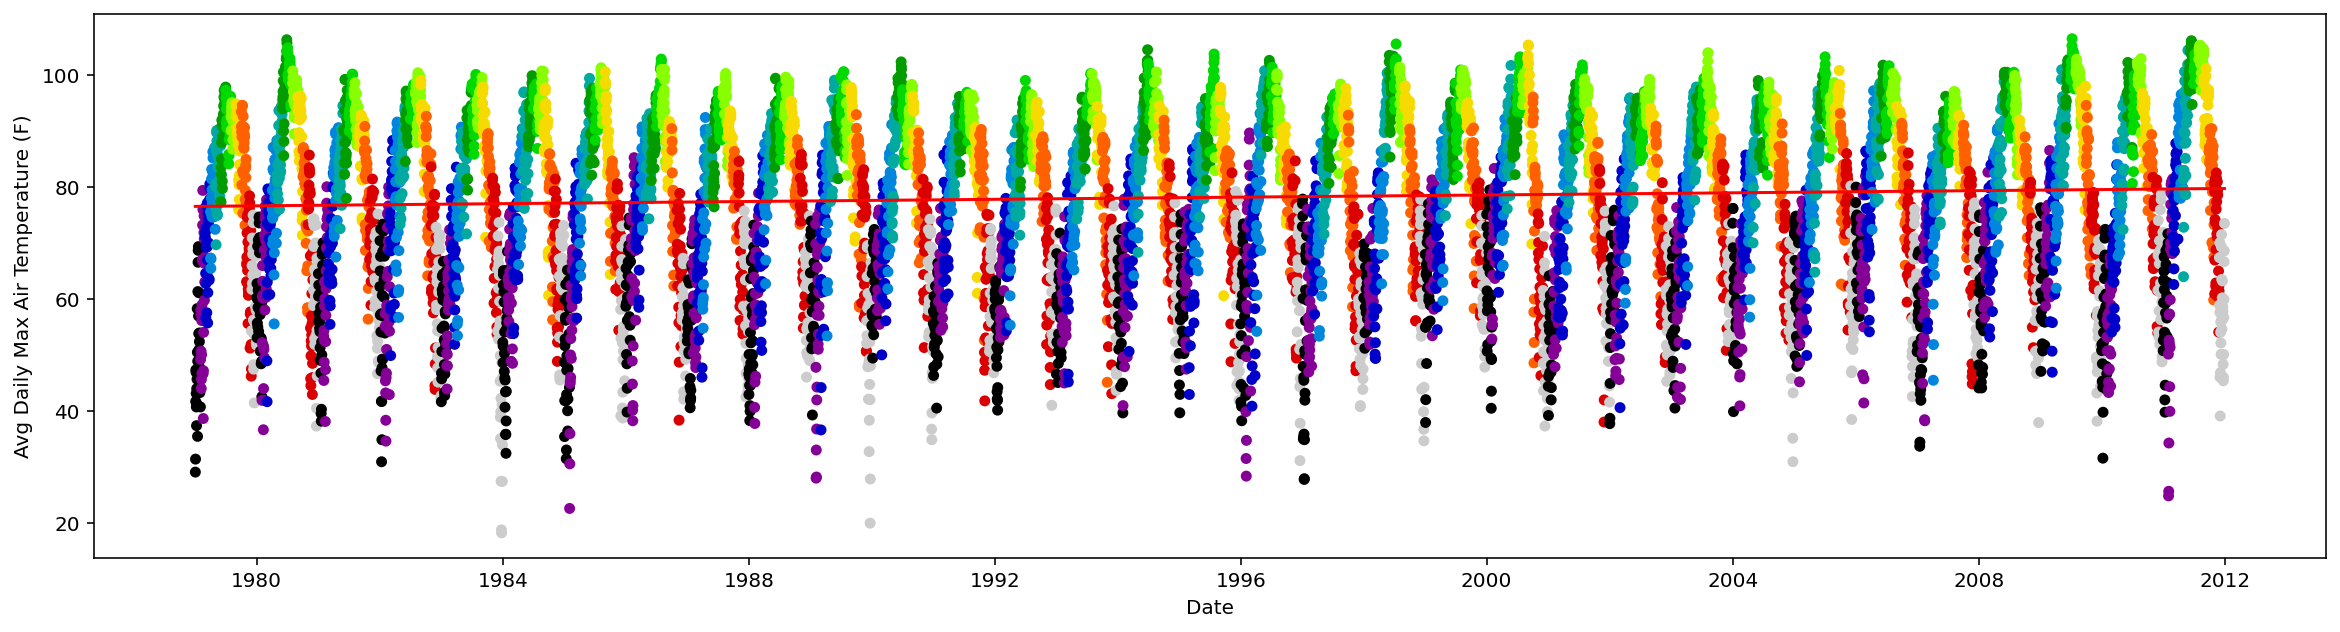

In [40]:
df.plot.scatter(x='Date', 
                y='Avg Daily Max Air Temperature (F)',
                figsize=(20,5),
                c=df['color'])
plt.plot([min(df['Date'].values), 
          max(df['Date'].values)], 
         [min(Y_pred), max(Y_pred)], 
         color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

Positive slope, meaning the average temperature is increasing (the climate is warming)